# Final Project - Personalization Theory

Authors: *Bertrand Thia-Thiong-Fat, Jeremy Yao, Paul Doan*

# Comparison of all our models

In order to pursue the study of the performances of our different models, we build 2 datasets of different sizes (that can be found in the folder *dataset*) using the first notebook *Data Preprocessing.ipynb*. For each of these datasets, we computed the different metrics we talked about at the beginning of our study.

Here are the details of the 2 datasets constructed:

* ***dataset_smaller.csv***
<br>There are 23242 active users. 
<br>They add up to a total of 230584 unique ratings. 
<br>There are 3995 different businesses

* ***dataset.csv***
<br>There are 30750 active users. 
<br>They add up to a total of 317153 unique ratings. 
<br>There are 4996 different businesses

This way, we will be able to observe the scalability or not of our different models. 
<br>We will however not conduct this study for the deep learning models as they take a lot of time to be trained. In a professionnal setting where we could have access to powerful machines and GPUs, this would not be an issue though.

Let us start by loading all the results of our different models built:

* ## Comparing the differents models on the same dataset

In [1]:
MAE_values = {'baseline_CF': 1.106744461,
              'baseline_average': 1.071486179,
              'content-based': 1.0387913730607607}

RMSE_values = {'baseline_CF': 1.533158232,
              'baseline_average': 1.296948263,
              'content-based': 1.4202680669143533}

RMSE_values_DL = {'simple AE': 1.3732531070709229,
                  'simple AE average': 0.9613847732543945,
                  'deep AE': 0.9755818843841553,
                  'deep AE average': 0.9731160998344421}

# In seconds (s)
running_time_values = {'baseline_CF': 483,
                       'baseline_average': 0.771584038,
                       'content-based': 504.6,
                       'simple AE': 1420.5,
                       'simple AE average': 608,
                       'deep AE': 882,
                       'deep AE average': 1358}

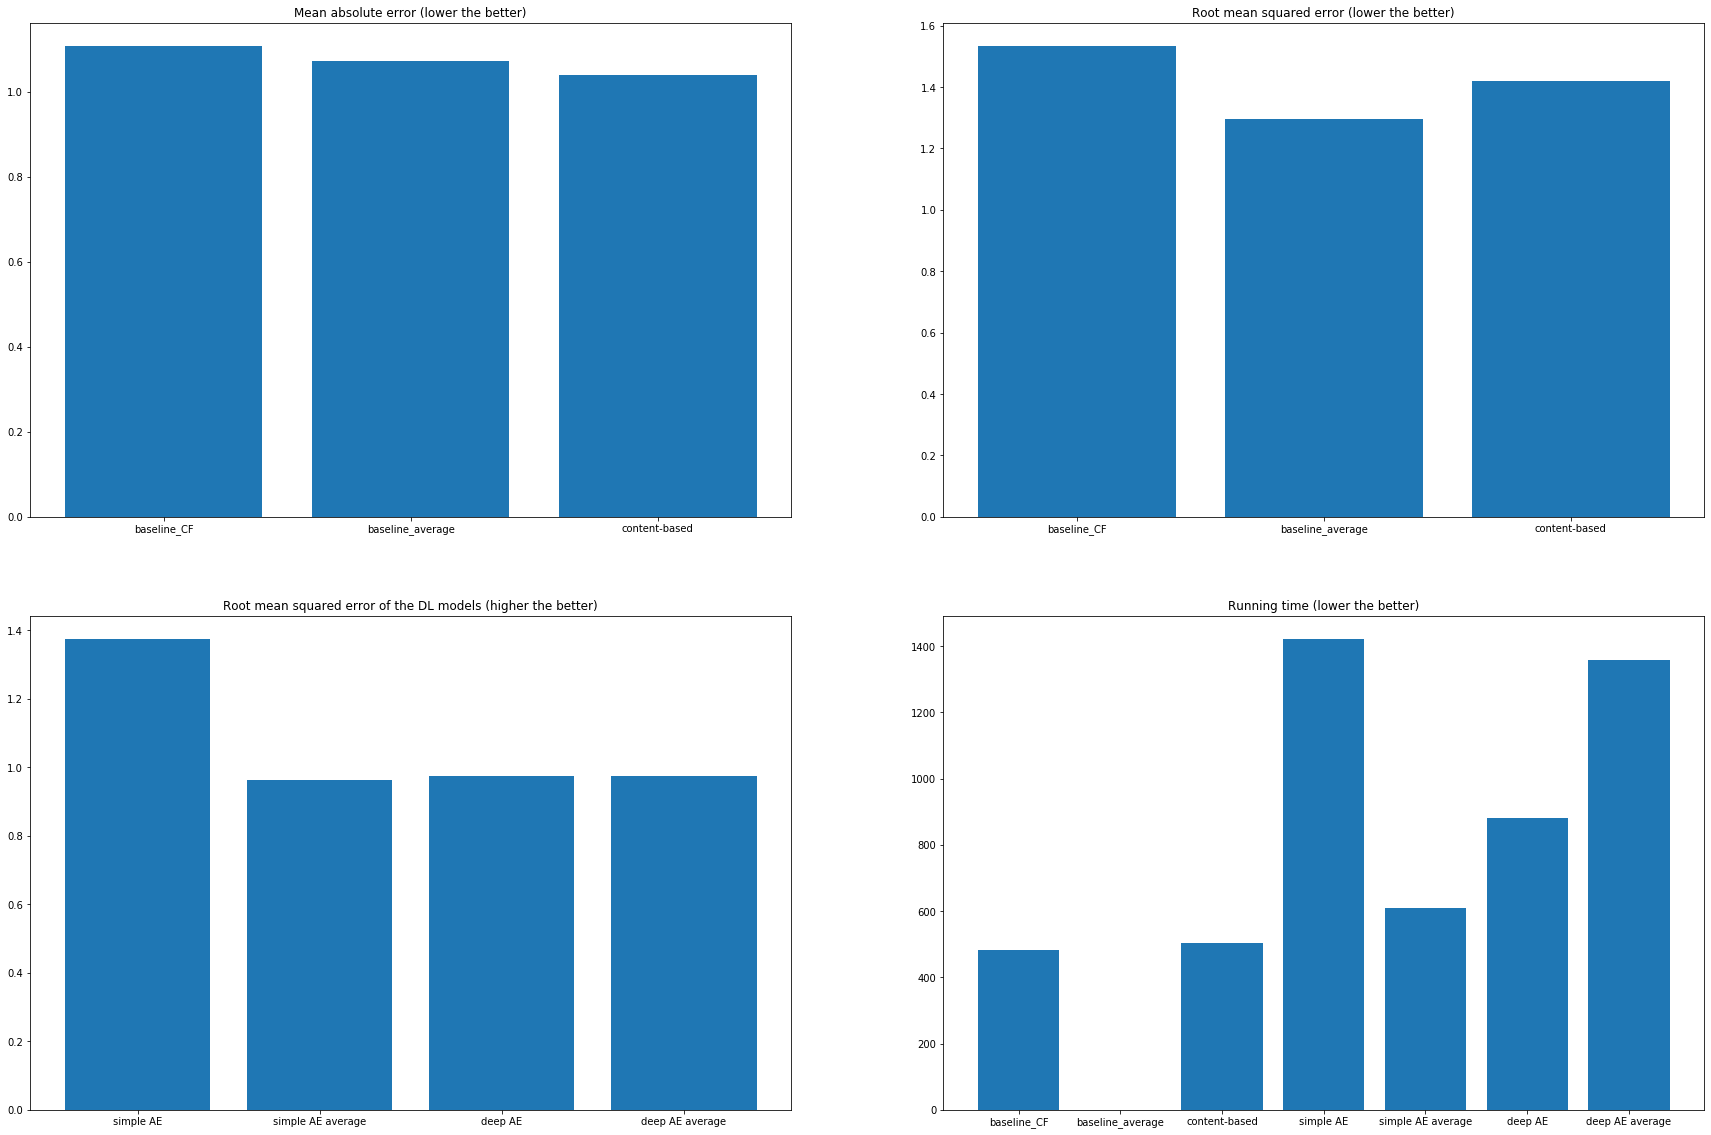

In [4]:
# Plotting the different metrics

%matplotlib inline
from matplotlib import pyplot as plt

alg = list(MAE_values.keys())

val_mae = list(MAE_values.values())
val_rmse = list(RMSE_values.values())
val_rmse_ = list(RMSE_values_DL.values())
val_time = list(running_time_values.values())


fig, axs = plt.subplots(2, 2, figsize=(30, 20))
axs[0, 0].bar(alg, val_mae)
axs[0, 0].set_title('Mean absolute error (lower the better)')
axs[0, 1].bar(alg, val_rmse)
axs[0, 1].set_title('Root mean squared error (lower the better)')

alg = list(RMSE_values_DL.keys())
axs[1, 0].bar(alg, val_rmse_)
axs[1, 0].set_title('Root mean squared error of the DL models (lower the better)')

alg = list(running_time_values.keys())
axs[1, 1].bar(alg, val_time)
axs[1, 1].set_title('Running time (lower the better)')
plt.show()

We have plotted above the performances of the seven different algorithms we created:
* a user-based collaborative filtering model (baseline) - *baseline CF*
* a baseline model that always returns the average global rating of the dataset - *baseline_average*
* a simple AutoEncoder trained with a training set filled with 0 when no rating - *simple AE*
* a simple AutoEncoder trained with a training set filled with the average global rating when no rating - *simple AE average*
* a Deep AutoEncoder trained with a training set filled with 0 when no rating - *Deep AE*
* a Deep AutoEncoder trained with a training set filled with the average global rating when no rating - *Deep AE average*

### In Overall,
In terms of accuracy, the best models for this specific random subset are the Deep Learning Models (Simple AE average, Deep AE and Deep AE average). Indeed, they have the lowest RMSE of all with a good margin. However, the running time of these models are quite high (higher than all of the other types of models we built), which is an important parameter to take into consideration in the business context. We are confronted with a trade-off, choosing one model over another means sacrificing computing time or relevancy of the recommendation.

### A good compromise,
would be to select the simple AutoEncoder (simple_AE_average). Indeed, its running time is the lowest among the deep learning models and its accuracy is one of the best we got as well. This choice depends on many aspects, but we have provided insights on the advantages and flaws of this model. The other alternative would be the baseline_average model as its running time is almost instantaneous and it has the second best accuracy after the deep learning models. 

* ## Comparison of our user-based model on different sampling sizes of the dataset

In [12]:
MAE_values_2 = {'baseline_CF': 1.106744461,
              'baseline_CF_small': 1.12441099,
              'baseline_average': 1.071486179,
              'baseline_average_small': 1.051286464,
              'content-based': 1.0387913730607607,
              'content-based_small': 1.0221535333413152}

RMSE_values_2 = {'baseline_CF': 1.533158232,
               'baseline_CF_small': 1.604150389,               
               'baseline_average': 1.296948263,
               'baseline_average_small': 1.278910237,
               'content-based': 1.4202680669143533,
               'content-based_small': 1.3910808549035383}

RMSE_values_DL_2 = {'simple AE': 1.3732531070709229,
                  'simple AE_small': 1.4543207883834839,
                  'simple AE average': 0.9613847732543945,
                  'simple AE average_small': 0.9645677804946899,
                  'deep AE': 0.9755818843841553,
                  'deep AE_small': 0.9832109808921814,
                  'deep AE average': 0.9731160998344421,
                  'deep AE average_small': 0.9537159204483032}

running_time_values_2 = {'baseline_CF': 483,
                       'baseline_CF_small': 214.2,
                       'baseline_average': 0.771584038,
                       'baseline_average_small': 0.771584038,
                       'content-based': 504.6,
                       'content-based_small': 420,
                       'simple AE': 1420.5,
                       'simple AE_small': 1000,
                       'simple AE average': 608,
                       'simple AE average_small': 473,
                       'deep AE_small': 882,
                       'deep AE': 882,
                       'deep AE_small': 720,
                       'deep AE average': 1358,
                       'deep AE average_small': 900}

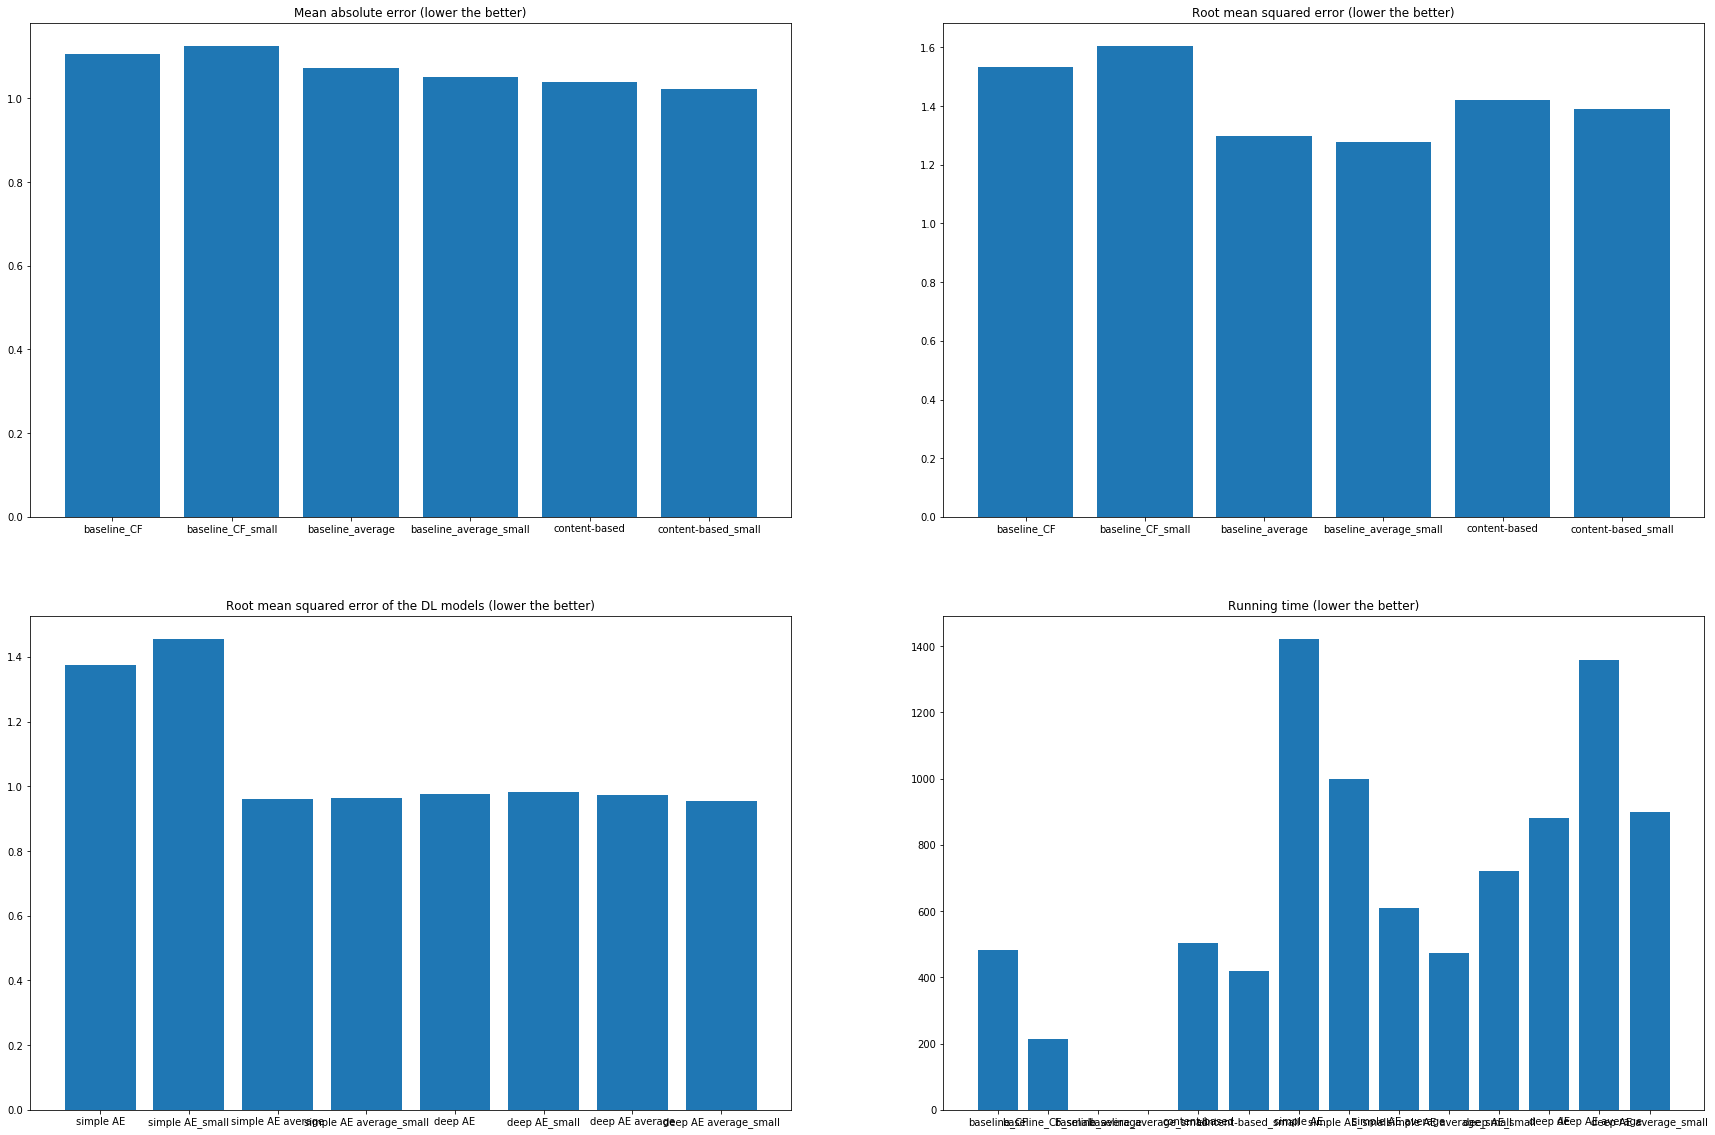

In [17]:
# Plotting the different metrics

%matplotlib inline
from matplotlib import pyplot as plt

alg_2 = list(MAE_values_2.keys())

val_mae_2 = list(MAE_values_2.values())
val_rmse_2 = list(RMSE_values_2.values())
val_rmse_2_ = list(RMSE_values_DL_2.values())
val_run_2 = list(running_time_values_2.values())


fig, axs = plt.subplots(2, 2, figsize=(30, 20))
axs[0, 0].bar(alg_2, val_mae_2)
axs[0, 0].set_title('Mean absolute error (lower the better)')
axs[0, 1].bar(alg_2, val_rmse_2)
axs[0, 1].set_title('Root mean squared error (lower the better)')

alg_3 = list(RMSE_values_DL_2.keys())
axs[1, 0].bar(alg_3, val_rmse_2_)
axs[1, 0].set_title('Root mean squared error of the DL models (lower the better)')

alg_4 = list(running_time_values_2.keys())
axs[1, 1].bar(alg_4, val_run_2)
axs[1, 1].set_title('Running time (lower the better)')
plt.show()

This plot allows us to get informations on how our model could perform with respect to the size of the data it is given.

Overall, the running time decreases with the datasize, as expected, while the accuracy tends to increase. 

Unfortunately, we did not have time to run more significant experiments with respect to the datasize, and the smaller dataset only has approximately 90k less rows than the bigger one. This is a study that would need to be deepened.

# Conclusion

From the business context at Yelp, we understand that the model needs to be efficacious, time-efficient and scalable. For instance, Yelp deals with customer who could be browsing for local restaurants. From this real-time data, we want to be able to recommend relevant business in a timely manner. This explains our interest on these metrics. A targeted and personalized experience could help Yelp in their customer satisfaction and drive their profit.

## 1. How to improve our models

It is difficult to measure the scalability of our different models since we did not have the time and the powerful machines required to conduct more experiments with respect to the datasize. Investigating into this aspect by training our algorithms on bigger datasets could be very valuable as we mentioned earlier. 
<br>Since the Deep Learning Models performed the best in our study, it could be relevant to fine-tune the models covered (AutoEncoders are simple model and effective as we saw), or even investigate in other models such as deep factorization machines or neural collaborative filtering.

## 2. Conclusion for the company

The deep learning models were highly performant, but had high time-complexity, whereas, the baseline models were fast and scalable, and also performant. Given this, we will recommend the following. We advise Yelp to split their customer groups given their activity (number of ratings and implicit interactions with the app). For the customers with fewer information, Yelp should implement a fast and tractable algorithm such as the baseline average. Because of the necessity to re-train the neural networks with new information, we will advise to train a simple autoencoder average that captures the preference of more senior customers. From this approach, Yelp will be able to be agile in learning consumer preference by applying fast and efficient learning algorithms on large-scale data.